# Compare Basin $\Delta$

Compare the deltas among the impacted flow paths with basin changes versus those without. 

HRU #1 and #2 are impacted. These runoff to Reach #1 which is routed to Reach #2 - Reach #3 - Reach #4 - Reach #5.

# Parameters and Imports

In [1]:
%matplotlib inline

In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
import seaborn as sns
from copy import deepcopy

In [3]:
IN_DIR = r'C:\Users\nmart\OneDrive\CC_IRD\Process_Results'
#IN_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\NumModel\HSPF\Bas' \
#          r'in_10P_10K\Processed'
BAS_SIM_ROOT = "Del_%s_DCmHBas_HRUs_"
REG_SIM_ROOT = "Del_%s_DCmH_HRUs_"
XLSX_ROOT = "%s_ProcessMonthly_Stats.xlsx"

In [4]:
HRUs = [ "HR1", "HR2" ]
RRs = [ "RR1", "RR2", "RR3", "RR4", "RR5" ]

In [5]:
OUT_DIR = IN_DIR
#OUT_DIR = r'\\augustine.space.swri.edu\jdrive\Groundwater\R8937_Stochastic_CC_Recharge\NumModel\HSPF\Bas' \
#          r'in_10P_10K\Processed\Outputs'

In [6]:
SM_NUM = 16

In [7]:
# time periods
TP_DICT = { 1 : [ dt.datetime(1981, 1, 1), dt.datetime(2010, 12, 31)],
            2 : [ dt.datetime(2011, 1, 1), dt.datetime(2040, 12, 31)],
            3 : [ dt.datetime(2041, 1, 1), dt.datetime(2070, 12, 31)],
            4 : [ dt.datetime(2071, 1, 1), dt.datetime(2100, 12, 31)],}

In [8]:
OurQs = np.array( [ round( 0.01 * x, 2 ) for x in range(101) ], dtype=np.float32 )
NumQs = len( OurQs )
NumQs

101

In [9]:
StatsHdsList = list()
for iI in range(NumQs):
    cQ = OurQs[iI]
    Hdr = "%d_ptile" % round(cQ * 100.0)
    StatsHdsList.append( Hdr )
# end of for
StatsHdsList.append( "Average" )
StatsHdsList.append( "Variance" )
StatsHdsList.append( "Skew" )
StatsHdsList.append( "Kurt" )

In [10]:
NumHdrs = len( StatsHdsList )
NumHdrs

105

In [11]:
RdHds = deepcopy( StatsHdsList )
RdHds.insert( 0, "Date" )

## Load Results

Start with HRU 1

In [12]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % HRUs[0] ) ) )
HR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

HRU 2

In [13]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % HRUs[1] ) ) )
HR2_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
HR2_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

RR 1

In [14]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % RRs[0] ) ) )
RR1_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR1_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

RR 2

In [15]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % RRs[1] ) ) )
RR2_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR2_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

RR 3

In [16]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % RRs[2] ) ) )
RR3_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR3_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

RR 4

In [17]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % RRs[3] ) ) )
RR4_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_2_RE = pd.read_excel( InFiler, sheet_name="RE_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_3_RE = pd.read_excel( InFiler, sheet_name="RE_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR4_4_RE = pd.read_excel( InFiler, sheet_name="RE_4", header=0, names=RdHds, index_col=0, parse_dates=True )

RR 5

In [18]:
InFiler = os.path.normpath( os.path.join( IN_DIR, XLSX_ROOT % ( BAS_SIM_ROOT % RRs[4] ) ) )
RR5_2_AET = pd.read_excel( InFiler, sheet_name="AET_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_3_AET = pd.read_excel( InFiler, sheet_name="AET_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_4_AET = pd.read_excel( InFiler, sheet_name="AET_4", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_2_RO = pd.read_excel( InFiler, sheet_name="RO_2", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_3_RO = pd.read_excel( InFiler, sheet_name="RO_3", header=0, names=RdHds, index_col=0, parse_dates=True )
RR5_4_RO = pd.read_excel( InFiler, sheet_name="RO_4", header=0, names=RdHds, index_col=0, parse_dates=True )

Make DateTime lists for filling

In [19]:
DTTL_2 = list( HR1_2_AET.index.to_pydatetime() )
DTTL_3 = list( HR1_3_AET.index.to_pydatetime() )
DTTL_4 = list( HR1_4_AET.index.to_pydatetime() )
BackDTList = deepcopy( DTTL_2 )
BackDTTL_2 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_3 )
BackDTTL_3 = BackDTList[::-1]
BackDTList = deepcopy( DTTL_4 )
BackDTTL_4 = BackDTList[::-1]
DTTimeList = deepcopy( DTTL_2 )
DTTimeList.extend( DTTL_3 )
DTTimeList.extend( DTTL_4 )
DTTimeList.extend( BackDTTL_4 )
DTTimeList.extend( BackDTTL_3 )
DTTimeList.extend( BackDTTL_2 )

## Plots

### HRU 1

Fourier smoothing

In [20]:
rft = np.fft.rfft( HR1_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_AET_4_ME = np.fft.irfft(rft)

In [21]:
rft = np.fft.rfft( HR1_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RE_4_ME = np.fft.irfft(rft)

In [22]:
rft = np.fft.rfft( HR1_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR1_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR1_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [23]:
Fil_HR1_AET_2_5 = list( FF_HR1_AET_2_05 )
Fil_HR1_AET_3_5 = list( FF_HR1_AET_3_05 )
Fil_HR1_AET_4_5 = list( FF_HR1_AET_4_05 )
BackDTList = list( FF_HR1_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_HR1_AET = deepcopy( Fil_HR1_AET_2_5 )
Fil_HR1_AET.extend( Fil_HR1_AET_3_5 )
Fil_HR1_AET.extend( Fil_HR1_AET_4_5 )
Fil_HR1_AET.extend( Back_AET_4_95 )
Fil_HR1_AET.extend( Back_AET_3_95 )
Fil_HR1_AET.extend( Back_AET_2_95 )

In [24]:
Fil_HR1_RE_2_5 = list( FF_HR1_RE_2_05 )
Fil_HR1_RE_3_5 = list( FF_HR1_RE_3_05 )
Fil_HR1_RE_4_5 = list( FF_HR1_RE_4_05 )
BackDTList = list( FF_HR1_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_HR1_RE = deepcopy( Fil_HR1_RE_2_5 )
Fil_HR1_RE.extend( Fil_HR1_RE_3_5 )
Fil_HR1_RE.extend( Fil_HR1_RE_4_5 )
Fil_HR1_RE.extend( Back_RE_4_95 )
Fil_HR1_RE.extend( Back_RE_3_95 )
Fil_HR1_RE.extend( Back_RE_2_95 )

In [25]:
Fil_HR1_RO_2_5 = list( FF_HR1_RO_2_05 )
Fil_HR1_RO_3_5 = list( FF_HR1_RO_3_05 )
Fil_HR1_RO_4_5 = list( FF_HR1_RO_4_05 )
BackDTList = list( FF_HR1_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR1_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_HR1_RO = deepcopy( Fil_HR1_RO_2_5 )
Fil_HR1_RO.extend( Fil_HR1_RO_3_5 )
Fil_HR1_RO.extend( Fil_HR1_RO_4_5 )
Fil_HR1_RO.extend( Back_RO_4_95 )
Fil_HR1_RO.extend( Back_RO_3_95 )
Fil_HR1_RO.extend( Back_RO_2_95 )

Plot

In [26]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR1_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR1_FF3WB.svg'

In [27]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR1_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR1_FF3WB.png'

In [28]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR1_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR1_FF3WB.pdf'

In [32]:
fsTicks = [ -4000.0, -2000.0, 0.0, 2000.0, 4000.0 ]

In [33]:
xTicks = [ dt.datetime( 2010, 1, 1 ), dt.datetime( 2040, 1, 1 ), dt.datetime( 2070, 1, 1), dt.datetime( 2100, 1, 1 ) ]

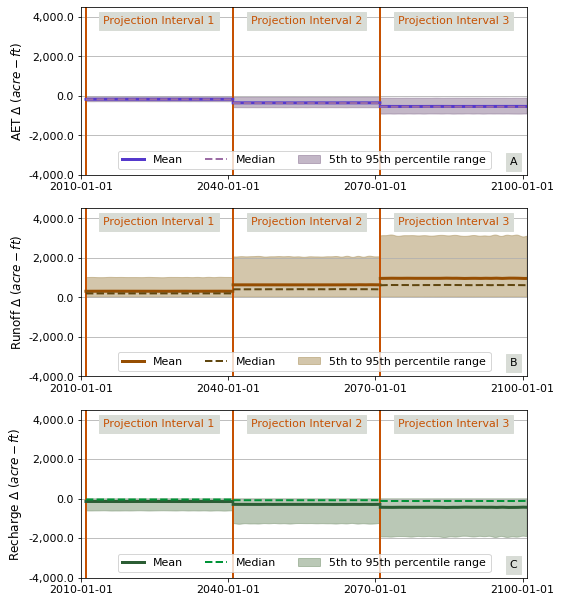

In [34]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_HR1_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( HR1_2_AET.index, FF_HR1_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( HR1_3_AET.index, FF_HR1_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( HR1_4_AET.index, FF_HR1_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( HR1_2_AET.index, FF_HR1_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( HR1_3_AET.index, FF_HR1_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( HR1_4_AET.index, FF_HR1_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-4000.0, 4500.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-ft$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_HR1_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( HR1_2_RO.index, FF_HR1_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( HR1_3_RO.index, FF_HR1_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( HR1_4_RO.index, FF_HR1_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( HR1_2_RO.index, FF_HR1_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( HR1_3_RO.index, FF_HR1_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( HR1_4_RO.index, FF_HR1_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-4000.0, 4500.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-ft$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_HR1_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( HR1_2_RE.index, FF_HR1_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( HR1_3_RE.index, FF_HR1_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( HR1_4_RE.index, FF_HR1_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( HR1_2_RE.index, FF_HR1_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( HR1_3_RE.index, FF_HR1_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( HR1_4_RE.index, FF_HR1_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-4000.0, 4500.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-ft$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### HRU 2

Fourier smoothing

In [35]:
rft = np.fft.rfft( HR2_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_AET_4_ME = np.fft.irfft(rft)

In [36]:
rft = np.fft.rfft( HR2_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RE_4_ME = np.fft.irfft(rft)

In [37]:
rft = np.fft.rfft( HR2_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( HR2_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_HR2_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [38]:
Fil_HR2_AET_2_5 = list( FF_HR2_AET_2_05 )
Fil_HR2_AET_3_5 = list( FF_HR2_AET_3_05 )
Fil_HR2_AET_4_5 = list( FF_HR2_AET_4_05 )
BackDTList = list( FF_HR2_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_HR2_AET = deepcopy( Fil_HR2_AET_2_5 )
Fil_HR2_AET.extend( Fil_HR2_AET_3_5 )
Fil_HR2_AET.extend( Fil_HR2_AET_4_5 )
Fil_HR2_AET.extend( Back_AET_4_95 )
Fil_HR2_AET.extend( Back_AET_3_95 )
Fil_HR2_AET.extend( Back_AET_2_95 )

In [39]:
Fil_HR2_RE_2_5 = list( FF_HR2_RE_2_05 )
Fil_HR2_RE_3_5 = list( FF_HR2_RE_3_05 )
Fil_HR2_RE_4_5 = list( FF_HR2_RE_4_05 )
BackDTList = list( FF_HR2_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_HR2_RE = deepcopy( Fil_HR2_RE_2_5 )
Fil_HR2_RE.extend( Fil_HR2_RE_3_5 )
Fil_HR2_RE.extend( Fil_HR2_RE_4_5 )
Fil_HR2_RE.extend( Back_RE_4_95 )
Fil_HR2_RE.extend( Back_RE_3_95 )
Fil_HR2_RE.extend( Back_RE_2_95 )

In [40]:
Fil_HR2_RO_2_5 = list( FF_HR2_RO_2_05 )
Fil_HR2_RO_3_5 = list( FF_HR2_RO_3_05 )
Fil_HR2_RO_4_5 = list( FF_HR2_RO_4_05 )
BackDTList = list( FF_HR2_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_HR2_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_HR2_RO = deepcopy( Fil_HR2_RO_2_5 )
Fil_HR2_RO.extend( Fil_HR2_RO_3_5 )
Fil_HR2_RO.extend( Fil_HR2_RO_4_5 )
Fil_HR2_RO.extend( Back_RO_4_95 )
Fil_HR2_RO.extend( Back_RO_3_95 )
Fil_HR2_RO.extend( Back_RO_2_95 )

Plot

In [41]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR2_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR2_FF3WB.svg'

In [42]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR2_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR2_FF3WB.png'

In [43]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_HR2_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_HR2_FF3WB.pdf'

In [44]:
fsTicks = [ -4000.0, -2000.0, 0.0, 2000.0, 4000.0 ]

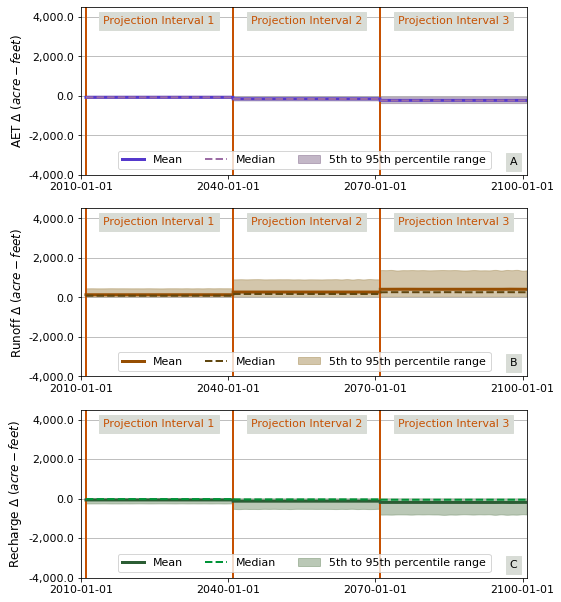

In [45]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_HR2_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( HR2_2_AET.index, FF_HR2_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( HR2_3_AET.index, FF_HR2_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( HR2_4_AET.index, FF_HR2_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( HR2_2_AET.index, FF_HR2_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( HR2_3_AET.index, FF_HR2_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( HR2_4_AET.index, FF_HR2_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-4000.0, 4500.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_HR2_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( HR2_2_RO.index, FF_HR2_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( HR2_3_RO.index, FF_HR2_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( HR2_4_RO.index, FF_HR2_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( HR2_2_RO.index, FF_HR2_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( HR2_3_RO.index, FF_HR2_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( HR2_4_RO.index, FF_HR2_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-4000.0, 4500.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-4000.0, 4500.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_HR2_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( HR2_2_RE.index, FF_HR2_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( HR2_3_RE.index, FF_HR2_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( HR2_4_RE.index, FF_HR2_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( HR2_2_RE.index, FF_HR2_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( HR2_3_RE.index, FF_HR2_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( HR2_4_RE.index, FF_HR2_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-4000.0, 4500.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-feet$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 1

Fourier smoothing

In [108]:
rft = np.fft.rfft( RR1_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_AET_4_ME = np.fft.irfft(rft)

In [109]:
rft = np.fft.rfft( RR1_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RE_4_ME = np.fft.irfft(rft)

In [110]:
rft = np.fft.rfft( RR1_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR1_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR1_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [111]:
Fil_RR1_AET_2_5 = list( FF_RR1_AET_2_05 )
Fil_RR1_AET_3_5 = list( FF_RR1_AET_3_05 )
Fil_RR1_AET_4_5 = list( FF_RR1_AET_4_05 )
BackDTList = list( FF_RR1_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_RR1_AET = deepcopy( Fil_RR1_AET_2_5 )
Fil_RR1_AET.extend( Fil_RR1_AET_3_5 )
Fil_RR1_AET.extend( Fil_RR1_AET_4_5 )
Fil_RR1_AET.extend( Back_AET_4_95 )
Fil_RR1_AET.extend( Back_AET_3_95 )
Fil_RR1_AET.extend( Back_AET_2_95 )

In [112]:
Fil_RR1_RE_2_5 = list( FF_RR1_RE_2_05 )
Fil_RR1_RE_3_5 = list( FF_RR1_RE_3_05 )
Fil_RR1_RE_4_5 = list( FF_RR1_RE_4_05 )
BackDTList = list( FF_RR1_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_RR1_RE = deepcopy( Fil_RR1_RE_2_5 )
Fil_RR1_RE.extend( Fil_RR1_RE_3_5 )
Fil_RR1_RE.extend( Fil_RR1_RE_4_5 )
Fil_RR1_RE.extend( Back_RE_4_95 )
Fil_RR1_RE.extend( Back_RE_3_95 )
Fil_RR1_RE.extend( Back_RE_2_95 )

In [113]:
Fil_RR1_RO_2_5 = list( FF_RR1_RO_2_05 )
Fil_RR1_RO_3_5 = list( FF_RR1_RO_3_05 )
Fil_RR1_RO_4_5 = list( FF_RR1_RO_4_05 )
BackDTList = list( FF_RR1_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR1_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_RR1_RO = deepcopy( Fil_RR1_RO_2_5 )
Fil_RR1_RO.extend( Fil_RR1_RO_3_5 )
Fil_RR1_RO.extend( Fil_RR1_RO_4_5 )
Fil_RR1_RO.extend( Back_RO_4_95 )
Fil_RR1_RO.extend( Back_RO_3_95 )
Fil_RR1_RO.extend( Back_RO_2_95 )

Plot

In [114]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR1_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR1_FF3WB.svg'

In [115]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR1_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR1_FF3WB.png'

In [116]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR1_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR1_FF3WB.pdf'

In [117]:
fsTicks = [ -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0 ]

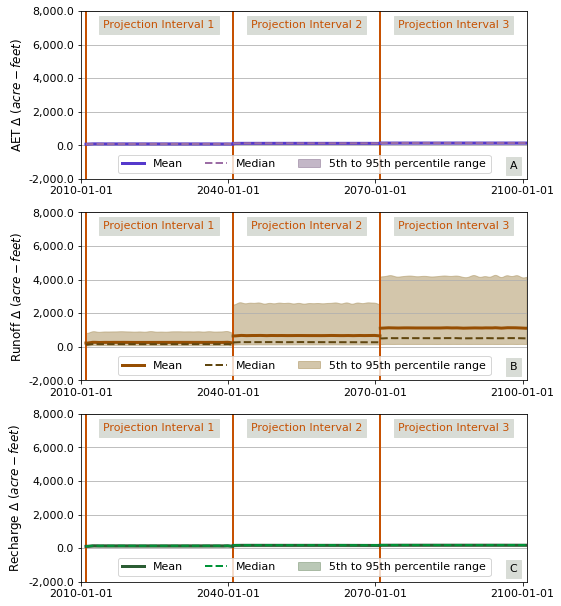

In [118]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_RR1_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( RR1_2_AET.index, FF_RR1_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( RR1_3_AET.index, FF_RR1_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR1_4_AET.index, FF_RR1_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR1_2_AET.index, FF_RR1_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( RR1_3_AET.index, FF_RR1_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( RR1_4_AET.index, FF_RR1_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-2000.0, 8000.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_RR1_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( RR1_2_RO.index, FF_RR1_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( RR1_3_RO.index, FF_RR1_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR1_4_RO.index, FF_RR1_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR1_2_RO.index, FF_RR1_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( RR1_3_RO.index, FF_RR1_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( RR1_4_RO.index, FF_RR1_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-2000.0, 8000.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_RR1_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( RR1_2_RE.index, FF_RR1_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( RR1_3_RE.index, FF_RR1_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR1_4_RE.index, FF_RR1_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR1_2_RE.index, FF_RR1_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( RR1_3_RE.index, FF_RR1_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( RR1_4_RE.index, FF_RR1_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-2000.0, 8000.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-feet$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 2

Fourier smoothing

In [119]:
rft = np.fft.rfft( RR2_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_AET_4_ME = np.fft.irfft(rft)

In [120]:
rft = np.fft.rfft( RR2_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RE_4_ME = np.fft.irfft(rft)

In [121]:
rft = np.fft.rfft( RR2_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR2_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR2_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [122]:
Fil_RR2_AET_2_5 = list( FF_RR2_AET_2_05 )
Fil_RR2_AET_3_5 = list( FF_RR2_AET_3_05 )
Fil_RR2_AET_4_5 = list( FF_RR2_AET_4_05 )
BackDTList = list( FF_RR2_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_RR2_AET = deepcopy( Fil_RR2_AET_2_5 )
Fil_RR2_AET.extend( Fil_RR2_AET_3_5 )
Fil_RR2_AET.extend( Fil_RR2_AET_4_5 )
Fil_RR2_AET.extend( Back_AET_4_95 )
Fil_RR2_AET.extend( Back_AET_3_95 )
Fil_RR2_AET.extend( Back_AET_2_95 )

In [123]:
Fil_RR2_RE_2_5 = list( FF_RR2_RE_2_05 )
Fil_RR2_RE_3_5 = list( FF_RR2_RE_3_05 )
Fil_RR2_RE_4_5 = list( FF_RR2_RE_4_05 )
BackDTList = list( FF_RR2_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_RR2_RE = deepcopy( Fil_RR2_RE_2_5 )
Fil_RR2_RE.extend( Fil_RR2_RE_3_5 )
Fil_RR2_RE.extend( Fil_RR2_RE_4_5 )
Fil_RR2_RE.extend( Back_RE_4_95 )
Fil_RR2_RE.extend( Back_RE_3_95 )
Fil_RR2_RE.extend( Back_RE_2_95 )

In [124]:
Fil_RR2_RO_2_5 = list( FF_RR2_RO_2_05 )
Fil_RR2_RO_3_5 = list( FF_RR2_RO_3_05 )
Fil_RR2_RO_4_5 = list( FF_RR2_RO_4_05 )
BackDTList = list( FF_RR2_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR2_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_RR2_RO = deepcopy( Fil_RR2_RO_2_5 )
Fil_RR2_RO.extend( Fil_RR2_RO_3_5 )
Fil_RR2_RO.extend( Fil_RR2_RO_4_5 )
Fil_RR2_RO.extend( Back_RO_4_95 )
Fil_RR2_RO.extend( Back_RO_3_95 )
Fil_RR2_RO.extend( Back_RO_2_95 )

Plot

In [125]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR2_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR2_FF3WB.svg'

In [126]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR2_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR2_FF3WB.png'

In [127]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR2_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR2_FF3WB.pdf'

In [128]:
fsTicks = [ -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0 ]

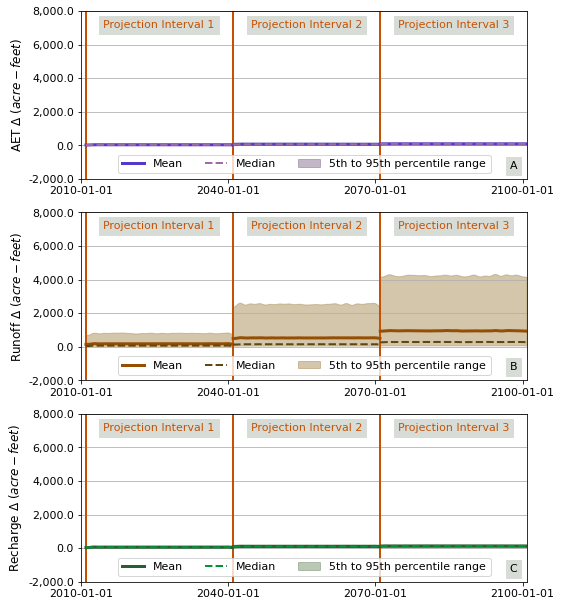

In [129]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_RR2_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( RR2_2_AET.index, FF_RR2_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( RR2_3_AET.index, FF_RR2_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR2_4_AET.index, FF_RR2_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR2_2_AET.index, FF_RR2_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( RR2_3_AET.index, FF_RR2_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( RR2_4_AET.index, FF_RR2_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-2000.0, 8000.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_RR2_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( RR2_2_RO.index, FF_RR2_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( RR2_3_RO.index, FF_RR2_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR2_4_RO.index, FF_RR2_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR2_2_RO.index, FF_RR2_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( RR2_3_RO.index, FF_RR2_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( RR2_4_RO.index, FF_RR2_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-2000.0, 8000.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_RR2_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( RR2_2_RE.index, FF_RR2_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( RR2_3_RE.index, FF_RR2_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR2_4_RE.index, FF_RR2_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR2_2_RE.index, FF_RR2_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( RR2_3_RE.index, FF_RR2_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( RR2_4_RE.index, FF_RR2_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-2000.0, 8000.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-feet$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 3

Fourier smoothing

In [130]:
rft = np.fft.rfft( RR3_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_AET_4_ME = np.fft.irfft(rft)

In [131]:
rft = np.fft.rfft( RR3_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RE_4_ME = np.fft.irfft(rft)

In [132]:
rft = np.fft.rfft( RR3_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR3_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR3_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [133]:
Fil_RR3_AET_2_5 = list( FF_RR3_AET_2_05 )
Fil_RR3_AET_3_5 = list( FF_RR3_AET_3_05 )
Fil_RR3_AET_4_5 = list( FF_RR3_AET_4_05 )
BackDTList = list( FF_RR3_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_RR3_AET = deepcopy( Fil_RR3_AET_2_5 )
Fil_RR3_AET.extend( Fil_RR3_AET_3_5 )
Fil_RR3_AET.extend( Fil_RR3_AET_4_5 )
Fil_RR3_AET.extend( Back_AET_4_95 )
Fil_RR3_AET.extend( Back_AET_3_95 )
Fil_RR3_AET.extend( Back_AET_2_95 )

In [134]:
Fil_RR3_RE_2_5 = list( FF_RR3_RE_2_05 )
Fil_RR3_RE_3_5 = list( FF_RR3_RE_3_05 )
Fil_RR3_RE_4_5 = list( FF_RR3_RE_4_05 )
BackDTList = list( FF_RR3_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_RR3_RE = deepcopy( Fil_RR3_RE_2_5 )
Fil_RR3_RE.extend( Fil_RR3_RE_3_5 )
Fil_RR3_RE.extend( Fil_RR3_RE_4_5 )
Fil_RR3_RE.extend( Back_RE_4_95 )
Fil_RR3_RE.extend( Back_RE_3_95 )
Fil_RR3_RE.extend( Back_RE_2_95 )

In [135]:
Fil_RR3_RO_2_5 = list( FF_RR3_RO_2_05 )
Fil_RR3_RO_3_5 = list( FF_RR3_RO_3_05 )
Fil_RR3_RO_4_5 = list( FF_RR3_RO_4_05 )
BackDTList = list( FF_RR3_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR3_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_RR3_RO = deepcopy( Fil_RR3_RO_2_5 )
Fil_RR3_RO.extend( Fil_RR3_RO_3_5 )
Fil_RR3_RO.extend( Fil_RR3_RO_4_5 )
Fil_RR3_RO.extend( Back_RO_4_95 )
Fil_RR3_RO.extend( Back_RO_3_95 )
Fil_RR3_RO.extend( Back_RO_2_95 )

Plot

In [136]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR3_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR3_FF3WB.svg'

In [137]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR3_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR3_FF3WB.png'

In [138]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR3_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR3_FF3WB.pdf'

In [139]:
fsTicks = [ -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0 ]

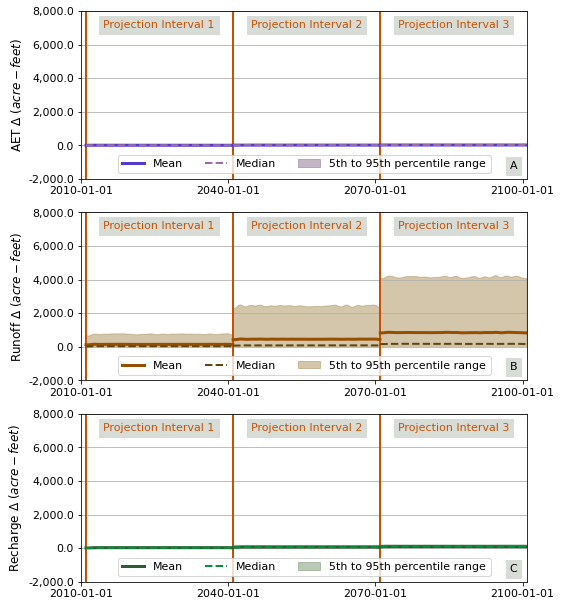

In [140]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_RR3_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( RR3_2_AET.index, FF_RR3_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( RR3_3_AET.index, FF_RR3_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR3_4_AET.index, FF_RR3_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR3_2_AET.index, FF_RR3_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( RR3_3_AET.index, FF_RR3_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( RR3_4_AET.index, FF_RR3_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-2000.0, 8000.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_RR3_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( RR3_2_RO.index, FF_RR3_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( RR3_3_RO.index, FF_RR3_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR3_4_RO.index, FF_RR3_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR3_2_RO.index, FF_RR3_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( RR3_3_RO.index, FF_RR3_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( RR3_4_RO.index, FF_RR3_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-2000.0, 8000.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_RR3_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( RR3_2_RE.index, FF_RR3_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( RR3_3_RE.index, FF_RR3_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR3_4_RE.index, FF_RR3_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR3_2_RE.index, FF_RR3_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( RR3_3_RE.index, FF_RR3_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( RR3_4_RE.index, FF_RR3_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-2000.0, 8000.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-feet$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 4

Fourier smoothing

In [141]:
rft = np.fft.rfft( RR4_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_AET_4_ME = np.fft.irfft(rft)

In [142]:
rft = np.fft.rfft( RR4_2_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RE[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RE[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RE[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RE[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RE_4_ME = np.fft.irfft(rft)

In [143]:
rft = np.fft.rfft( RR4_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR4_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR4_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [144]:
Fil_RR4_AET_2_5 = list( FF_RR4_AET_2_05 )
Fil_RR4_AET_3_5 = list( FF_RR4_AET_3_05 )
Fil_RR4_AET_4_5 = list( FF_RR4_AET_4_05 )
BackDTList = list( FF_RR4_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_RR4_AET = deepcopy( Fil_RR4_AET_2_5 )
Fil_RR4_AET.extend( Fil_RR4_AET_3_5 )
Fil_RR4_AET.extend( Fil_RR4_AET_4_5 )
Fil_RR4_AET.extend( Back_AET_4_95 )
Fil_RR4_AET.extend( Back_AET_3_95 )
Fil_RR4_AET.extend( Back_AET_2_95 )

In [145]:
Fil_RR4_RE_2_5 = list( FF_RR4_RE_2_05 )
Fil_RR4_RE_3_5 = list( FF_RR4_RE_3_05 )
Fil_RR4_RE_4_5 = list( FF_RR4_RE_4_05 )
BackDTList = list( FF_RR4_RE_4_95 )
Back_RE_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_RE_3_95 )
Back_RE_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_RE_2_95 )
Back_RE_2_95 = BackDTList[::-1]
Fil_RR4_RE = deepcopy( Fil_RR4_RE_2_5 )
Fil_RR4_RE.extend( Fil_RR4_RE_3_5 )
Fil_RR4_RE.extend( Fil_RR4_RE_4_5 )
Fil_RR4_RE.extend( Back_RE_4_95 )
Fil_RR4_RE.extend( Back_RE_3_95 )
Fil_RR4_RE.extend( Back_RE_2_95 )

In [146]:
Fil_RR4_RO_2_5 = list( FF_RR4_RO_2_05 )
Fil_RR4_RO_3_5 = list( FF_RR4_RO_3_05 )
Fil_RR4_RO_4_5 = list( FF_RR4_RO_4_05 )
BackDTList = list( FF_RR4_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR4_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_RR4_RO = deepcopy( Fil_RR4_RO_2_5 )
Fil_RR4_RO.extend( Fil_RR4_RO_3_5 )
Fil_RR4_RO.extend( Fil_RR4_RO_4_5 )
Fil_RR4_RO.extend( Back_RO_4_95 )
Fil_RR4_RO.extend( Back_RO_3_95 )
Fil_RR4_RO.extend( Back_RO_2_95 )

Plot

In [147]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR4_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR4_FF3WB.svg'

In [148]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR4_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR4_FF3WB.png'

In [149]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR4_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR4_FF3WB.pdf'

In [150]:
fsTicks = [ -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0 ]

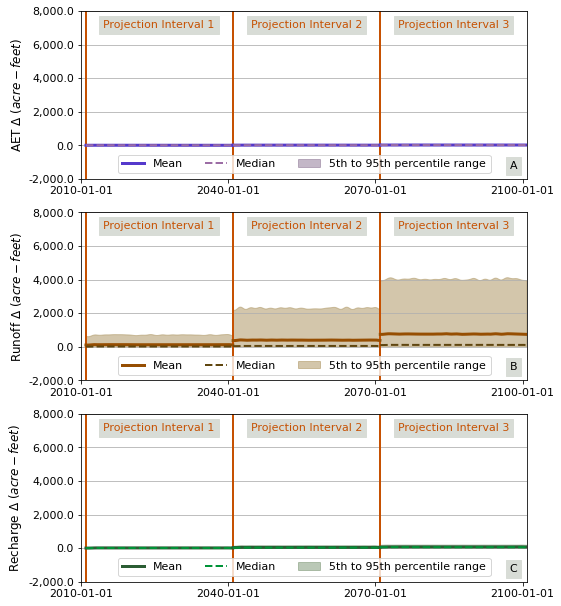

In [151]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_RR4_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( RR4_2_AET.index, FF_RR4_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( RR4_3_AET.index, FF_RR4_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR4_4_AET.index, FF_RR4_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR4_2_AET.index, FF_RR4_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( RR4_3_AET.index, FF_RR4_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( RR4_4_AET.index, FF_RR4_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-2000.0, 8000.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_RR4_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( RR4_2_RO.index, FF_RR4_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( RR4_3_RO.index, FF_RR4_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR4_4_RO.index, FF_RR4_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR4_2_RO.index, FF_RR4_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( RR4_3_RO.index, FF_RR4_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( RR4_4_RO.index, FF_RR4_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-2000.0, 8000.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51 = Fig1.add_subplot(3,1,3)
ax51.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax51.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax51.fill( DTTimeList, Fil_RR4_RE, color='xkcd:green grey', alpha=0.50, 
                 label="5th to 95th percentile range")
ax51.plot( RR4_2_RE.index, FF_RR4_RE_2_ME, linestyle='-',
           linewidth=3, color='xkcd:pine', label='Mean' )
ax51.plot( RR4_3_RE.index, FF_RR4_RE_3_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR4_4_RE.index, FF_RR4_RE_4_ME, linestyle='-',
           linewidth=3, color='xkcd:pine' )
ax51.plot( RR4_2_RE.index, FF_RR4_RE_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green', label='Median' )
ax51.plot( RR4_3_RE.index, FF_RR4_RE_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.plot( RR4_4_RE.index, FF_RR4_RE_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:kelley green' )
ax51.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax51.set_xticks( xTicks )
ax51.set_yticks( fsTicks )
ax51.set_ylim( (-2000.0, 8000.0) )
ax51.grid(True, axis='y', which='both')
ax51.set_ylabel('Recharge $\Delta$ ($acre-feet$)', fontsize=12)
ax51.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax51.tick_params(axis='both', which='major', labelsize=11)
ax51.tick_params(axis='x', which='major', labelrotation=0.0)
ax51.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax51.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax51.annotate("C", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax51.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax51.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )

### Reach 5

Fourier smoothing

In [152]:
rft = np.fft.rfft( RR5_2_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_AET[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_AET[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_AET[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_AET[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_AET_4_ME = np.fft.irfft(rft)

In [153]:
rft = np.fft.rfft( RR5_2_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_2_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_3_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_RO[StatsHdsList[95]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_4_95 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_2_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_3_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_RO[StatsHdsList[5]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_4_05 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_2_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_3_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_RO[StatsHdsList[50]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_4_50 = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_2_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_2_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_3_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_3_ME = np.fft.irfft(rft)
rft = np.fft.rfft( RR5_4_RO[StatsHdsList[101]].to_numpy() )
rft[SM_NUM:] = 0.0
FF_RR5_RO_4_ME = np.fft.irfft(rft)

Filled confidence interval areas

In [154]:
Fil_RR5_AET_2_5 = list( FF_RR5_AET_2_05 )
Fil_RR5_AET_3_5 = list( FF_RR5_AET_3_05 )
Fil_RR5_AET_4_5 = list( FF_RR5_AET_4_05 )
BackDTList = list( FF_RR5_AET_4_95 )
Back_AET_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR5_AET_3_95 )
Back_AET_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR5_AET_2_95 )
Back_AET_2_95 = BackDTList[::-1]
Fil_RR5_AET = deepcopy( Fil_RR5_AET_2_5 )
Fil_RR5_AET.extend( Fil_RR5_AET_3_5 )
Fil_RR5_AET.extend( Fil_RR5_AET_4_5 )
Fil_RR5_AET.extend( Back_AET_4_95 )
Fil_RR5_AET.extend( Back_AET_3_95 )
Fil_RR5_AET.extend( Back_AET_2_95 )

In [155]:
Fil_RR5_RO_2_5 = list( FF_RR5_RO_2_05 )
Fil_RR5_RO_3_5 = list( FF_RR5_RO_3_05 )
Fil_RR5_RO_4_5 = list( FF_RR5_RO_4_05 )
BackDTList = list( FF_RR5_RO_4_95 )
Back_RO_4_95 = BackDTList[::-1]
BackDTList = list( FF_RR5_RO_3_95 )
Back_RO_3_95 = BackDTList[::-1]
BackDTList = list( FF_RR5_RO_2_95 )
Back_RO_2_95 = BackDTList[::-1]
Fil_RR5_RO = deepcopy( Fil_RR5_RO_2_5 )
Fil_RR5_RO.extend( Fil_RR5_RO_3_5 )
Fil_RR5_RO.extend( Fil_RR5_RO_4_5 )
Fil_RR5_RO.extend( Back_RO_4_95 )
Fil_RR5_RO.extend( Back_RO_3_95 )
Fil_RR5_RO.extend( Back_RO_2_95 )

Plot

In [156]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR5_FF3WB.svg" ) )
OutSVG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR5_FF3WB.svg'

In [157]:
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR5_FF3WB.png" ) )
OutPNG

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR5_FF3WB.png'

In [158]:
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "DelBas_RR5_FF3WB.pdf" ) )
OutPDF

'C:\\Users\\nmart\\OneDrive\\CC_IRD\\Process_Results\\Plots\\DelBas_RR5_FF3WB.pdf'

In [159]:
fsTicks = [ -2000.0, 0.0, 2000.0, 4000.0, 6000.0, 8000.0 ]

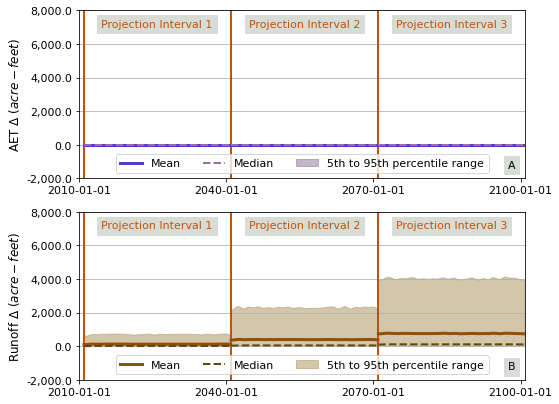

In [160]:
Fig1 = plt.figure()
Fig1.set_size_inches(8, 10.5)
ax31 = Fig1.add_subplot(3,1,1)
ax31.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax31.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax31.fill( DTTimeList, Fil_RR5_AET, color='xkcd:greyish purple', alpha=0.50, 
                 label="5th to 95th percentile range" )
ax31.plot( RR5_2_AET.index, FF_RR5_AET_2_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple', label='Mean' )
ax31.plot( RR5_3_AET.index, FF_RR5_AET_3_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR5_4_AET.index, FF_RR5_AET_4_ME, linestyle='-',
           linewidth=3, color='xkcd:blurple' )
ax31.plot( RR5_2_AET.index, FF_RR5_AET_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac', label='Median' )
ax31.plot( RR5_3_AET.index, FF_RR5_AET_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.plot( RR5_4_AET.index, FF_RR5_AET_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:dark lilac' )
ax31.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax31.set_xticks( xTicks )
ax31.set_yticks( fsTicks )
ax31.set_ylim( (-2000.0, 8000.0) )
ax31.grid(True, axis='y', which='both')
ax31.set_ylabel('AET $\Delta$ ($acre-feet$)', fontsize=12)
ax31.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax31.tick_params(axis='both', which='major', labelsize=11)
ax31.tick_params(axis='x', which='major', labelrotation=0.0)
ax31.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax31.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax31.annotate("A", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax31.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax31.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41 = Fig1.add_subplot(3,1,2)
ax41.plot( [TP_DICT[2][0], TP_DICT[2][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[3][0], TP_DICT[3][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
ax41.plot( [TP_DICT[4][0], TP_DICT[4][0]], [-2000.0, 8000.0], linestyle='-',
           linewidth=2, color='xkcd:dark orange' )
sfF = ax41.fill( DTTimeList, Fil_RR5_RO, color='xkcd:dark sand', alpha=0.50, 
                 label="5th to 95th percentile range")
ax41.plot( RR5_2_RO.index, FF_RR5_RO_2_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown', label='Mean' )
ax41.plot( RR5_3_RO.index, FF_RR5_RO_3_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR5_4_RO.index, FF_RR5_RO_4_ME, linestyle='-',
           linewidth=3, color='xkcd:warm brown' )
ax41.plot( RR5_2_RO.index, FF_RR5_RO_2_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown', label='Median' )
ax41.plot( RR5_3_RO.index, FF_RR5_RO_3_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.plot( RR5_4_RO.index, FF_RR5_RO_4_50, linestyle='dashed',
           linewidth=2, color='xkcd:mud brown' )
ax41.set_xlim( (dt.datetime(2010, 1, 1), TP_DICT[4][1]))
ax41.set_xticks( xTicks )
ax41.set_yticks( fsTicks )
ax41.set_ylim( (-2000.0, 8000.0) )
ax41.grid(True, axis='y', which='both')
ax41.set_ylabel('Runoff $\Delta$ ($acre-feet$)', fontsize=12)
ax41.legend( loc='lower center', fontsize=11.0, ncol=3 )
ax41.tick_params(axis='both', which='major', labelsize=11)
ax41.tick_params(axis='x', which='major', labelrotation=0.0)
ax41.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax41.xaxis.set_major_formatter( mpl.dates.DateFormatter("%Y-%m-%d") )
ax41.annotate("B", xy=(0.96,0.06), xycoords="axes fraction", fontsize=11.0,
              backgroundcolor="xkcd:light grey")
ax41.annotate("Projection Interval 1", xy=(0.05, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 2", xy=(0.38, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
ax41.annotate("Projection Interval 3", xy=(0.71, 0.90), xycoords="axes fraction",
              fontsize=11.0, color="xkcd:dark orange", backgroundcolor="xkcd:light grey" )
Fig1.savefig( OutSVG )
Fig1.savefig( OutPNG )
Fig1.savefig( OutPDF )